In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
zip_filepath = os.path.join('/content/drive/MyDrive/Colab Notebooks', "Flower_Classification.zip")

Charger les images avec image_dataset_from_directory

In [25]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/Flower_Classification

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: Data/train/iris/17779345575_de76cd0e3a_c.jpg  
  inflating: Data/train/iris/17826727169_991cf11676_c.jpg  
  inflating: Data/train/iris/17858672081_4b4d071116_c.jpg  
  inflating: Data/train/iris/17885928250_451875aec2_c.jpg  
  inflating: Data/train/iris/17948299355_2161a031db_c.jpg  
  inflating: Data/train/iris/17959086836_3e706d918b_c.jpg  
  inflating: Data/train/iris/18054931376_23052f68d0_c.jpg  
  inflating: Data/train/iris/18059533553_186ccb451a_c.jpg  
  inflating: Data/train/iris/18076633321_400ea17b5a_c.jpg  
  inflating: Data/train/iris/18120244292_ea11fcc9c5_c.jpg  
  inflating: Data/train/iris/181379030_afebe26851_c.jpg  
  inflating: Data/train/iris/18141122602_118114762d_c.jpg  
  inflating: Data/train/iris/18256508742_af6a8f4222_c.jpg  
  inflating: Data/train/iris/18280071332_c6bc90d75a_c.jpg  
  inflating: Data/train/iris/18348714266_33a7bf205f_c.jpg  
  inflating: Data/train/

In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [41]:

# Définir le chemin du dataset (modifiez selon votre cas)
# Removing extra comma and space from path
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Data/train"

# Charger l'ensemble de données avec image_dataset_from_directory
# dataset_path = "/content/drive/MyDrive/Colab\Notebooks/Data/train"

# Charger l'ensemble de données avec image_dataset_from_directory
batch_size = 32
img_height = 180
img_width = 180

train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

# Obtenir les noms des classes
class_names = train_dataset.class_names
print("Classes détectées:", class_names)


Found 13642 files belonging to 14 classes.
Classes détectées: ['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']


Imprimer le nombre d'images par classe

In [42]:
# Obtenir les noms des classes
class_names = train_dataset.class_names
print("Classes détectées:", class_names)

Classes détectées: ['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']


Afficher une grille 3x3 d'images par classe

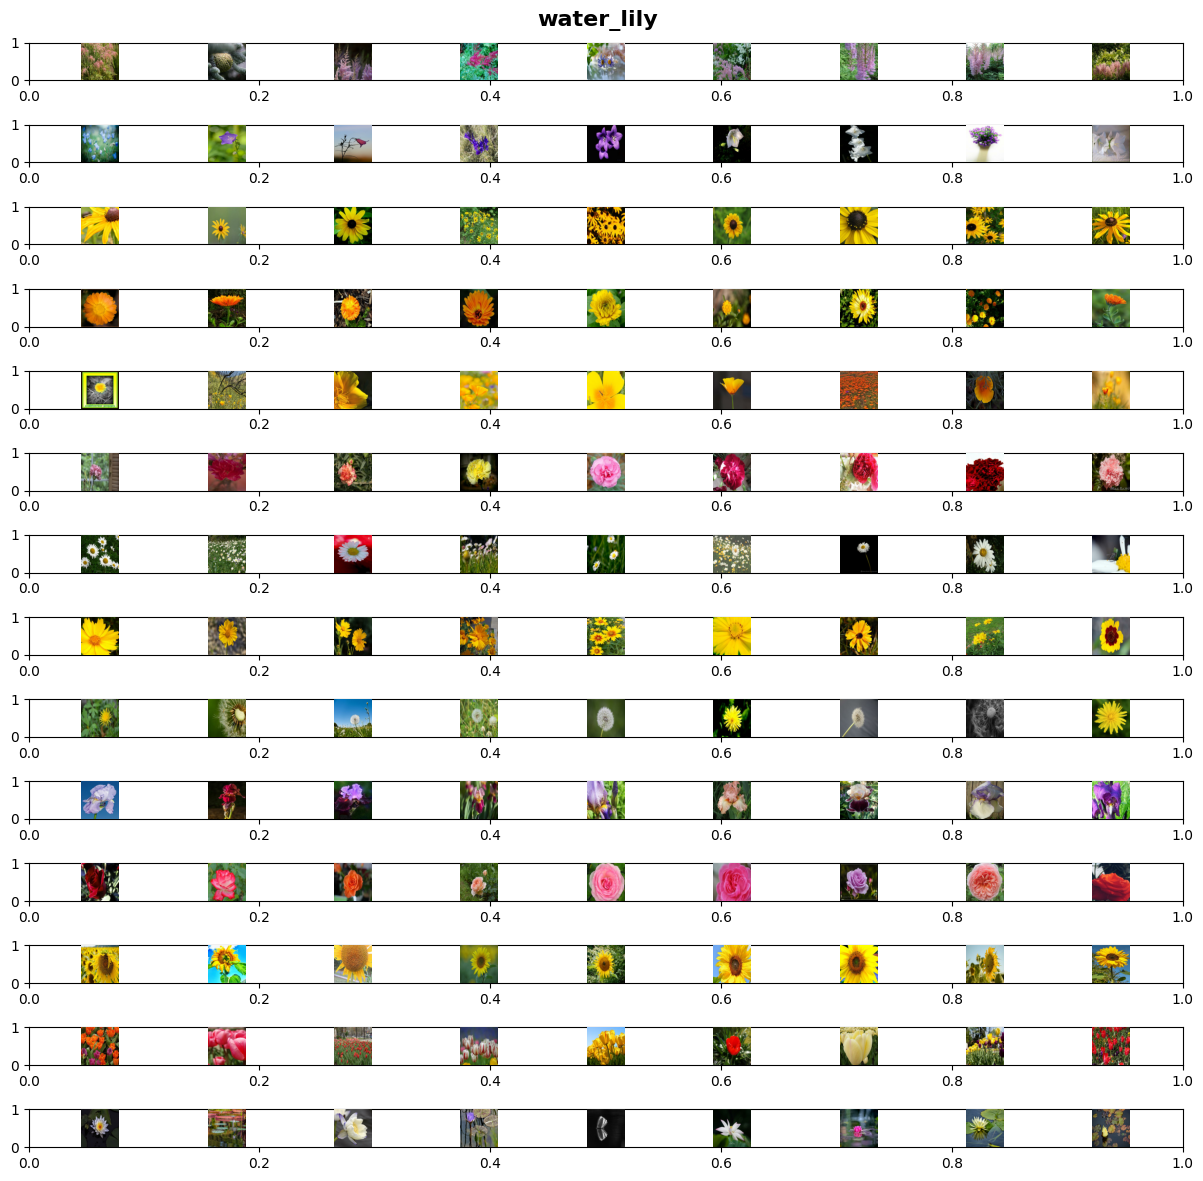

In [43]:
import numpy as np

# Définition de la fonction visualize_images
def visualize_images(dataset, class_names):
    plt.figure(figsize=(12, 12))

# visualize_images prend deux arguments :
# dataset : le dataset contenant les images et les labels (fourni par image_dataset_from_directory).
# class_names : la liste des noms de classes (par exemple ["daisy", "rose", "sunflower"]).

    # Prendre un batch du dataset
    #Parcourir chaque classe de fleurs
    for class_idx, class_name in enumerate(class_names):
        plt.subplot(len(class_names), 1, class_idx + 1)
        plt.suptitle(class_name, fontsize=16, fontweight="bold")


#Sélectionner et afficher 9 images par classe
        images_shown = 0
        for images, labels in dataset:
            for img, label in zip(images.numpy(), labels.numpy()):
                if class_names[label] == class_name and images_shown < 9:
                    plt.subplot(len(class_names), 9, class_idx * 9 + images_shown + 1)
                    plt.imshow(img.astype("uint8"))
                    plt.axis("off")
                    images_shown += 1
                if images_shown == 9:
                    break
            if images_shown == 9:
                break

    plt.tight_layout()
    plt.show()

# Affichage des images
visualize_images(train_dataset, class_names)


 Architecture de base du CNN

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Définition de l'architecture du CNN
# Augmentation du nombre de filtres et de couches

model = keras.Sequential([
    #Taille des noyaux (kernel_size)
    # 1ère couche convolutive
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),  # Ajoutons BatchNormalization après chaque couche convolutive juste pour bien ranger la data

    # 2ème couche convolutive
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(), # Ajoutons BatchNormalization après chaque couche convolutive juste pour bien ranger la data

    # 3ème couche convolutive
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),  # Ajoutons BatchNormalization après chaque couche convolutive juste pour bien ranger la data

    # Aplatissement des caractéristiques
    layers.Flatten(),

    # Couche dense avec dropout pour éviter l'overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Couche de sortie (Softmax pour classification multi-classe)
    layers.Dense(5, activation='softmax')  # Supposons 5 classes de fleurs
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Adam : Plus rapide et efficace pour les datasets complexes.
# SGD (Stochastic Gradient Descent) : Peut être plus stable pour les grands datasets, mais nécessite plus de réglages.


# Résumé du modèle
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,621 (25.36 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

Tester différentes fonctions de perte

In [46]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

loss_function = SparseCategoricalCrossentropy(from_logits=True)
# Comme c'est un problème de classification (probablement multi-classes), voici les options :

# 1️⃣ SparseCategoricalCrossentropy (si les labels sont des entiers).
# 2️⃣ CategoricalCrossentropy (si les labels sont one-hot encodés).


Utiliser des techniques d'optimisation avancées

In [48]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# 🔹 📉 Planification du taux d’apprentissage (Learning Rate Scheduling)

#     Réduit progressivement le learning_rate pour stabiliser l'entraînement.
#     Ex : ReduceLROnPlateau réduit si la validation ne s'améliore pas.


Arrêt précoce avec (Early Stopping)

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Arrête l'entraînement si la validation n'améliore plus.

Suivi des expériences et évaluation

Afficher l'évolution de la perte et de la précision

In [61]:
import matplotlib.pyplot as plt

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Data/train",  # Mets ici le bon chemin vers ton dossier d'entraînement
    image_size=(224, 224),
    batch_size=32
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Data/val",  # Mets ici le bon chemin vers ton dossier de validation
    image_size=(224, 224),
    batch_size=32
)

# Récupérer l'historique de l'entraînement
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[early_stopping, lr_scheduler])
# Affichage de la courbe de perte
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.title('Évolution de la perte')

# Affichage de la courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.title('Évolution de la précision')

plt.show()


Found 13642 files belonging to 14 classes.
Found 98 files belonging to 14 classes.
Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-61-7d3ed88308ac>", line 16, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 60, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 691, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 700, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 33, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 2246, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py", line 1963, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 744, in sparse_categorical_crossentropy

Received a label value of 13 which is outside the valid range of [0, 5).  Label values: 3 7 5 5 8 8 10 5 13 4 2 1 3 8 8 9 10 1 1 7 11 12 9 10 2 6 0 3 11 11 1 7
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_4413]

In [60]:

from tensorflow.keras import layers

# Define the CNN architecture
# Increased number of filters and layers

model = keras.Sequential([
    # Kernel size
    # 1st convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Changed input_shape to (224, 224, 3)
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # 2nd convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # 3rd convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Flatten the features
    layers.Flatten(),

    # Dense layer with dropout to prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output layer (Softmax for multi-class classification)
    layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
